<div class="alert block-alert alert-success">
    <h1>Task 6 - Introduction to machine learning - Decision Tree</h1> <span class="tocSkip"></span>
</div>

Требуется исследовать, зависит ли факт провала клиента в просрочку от набора признаков. Постройте дерево решений и сделайте вывод о взаимосвязях. Факт провала в просрочку (таргет-величина) представлена колонкой `flag_coll` (1 - провалился в просрочку, 0 - не провалился в просрочку)

**Описание признаков:**

- `amt_credit` - Размер выданного кредита
- `bki` - Размер внешнего долга по Бюро Кредитный Историй
- `age` - возраст клиента (полных лет)
- `is_educ` - флаг, показывающий, есть ли у клиента высшее образование
- `cl_segm` - клиентский сегмент (качество клиента, от 1 до 4)
- `credit_type` - кредитный продукт
    - CC - Credit Card (Кредитная карта)
    - POS - потребительский кредит
- `fssp` - размер долга, переданный в Федеральную Службу Судебных Приставов
- `cnt_closed_contract` - кол-во уже закрытых клиентом контрактов в нашем банке
- `is_cellphone` - флаг, показывающий, есть ли у клиента подтвержденный номер мобильного телефона

### Задание<span class="tocSkip"></span>
 
1. Подготовьте данные для анализа:
    - проверьте таргет-величину (flag_coll) на наличие нуллов и странных значений.
    - проверьте остальные признаки на наличие нуллов 
2. Проведите анализ каждого признака по отдельности: постройте гистограмму распределения значений признака и визализируйте доли значений таргет-величины в рамках каждого значения признака
3. Сделайте замену категориальных признаков на числовые
4. Разделите выборку на тест и тренинг
5. Постройте дерево решений с помощью библиотеки sklearn
6. Рассчитайте accuracy_score и посмотрите, как это значение зависит от соотношения размеров тестовой и тренинговой выборки
7. Визуализируйте confusion matrix результата

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных-для-анализа" data-toc-modified-id="Подготовка-данных-для-анализа-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных для анализа</a></span><ul class="toc-item"><li><span><a href="#Импорт-данных" data-toc-modified-id="Импорт-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт данных</a></span></li><li><span><a href="#Проверка-таргет-величины-flag_coll-на-наличие-null-и-странных-значений" data-toc-modified-id="Проверка-таргет-величины-flag_coll-на-наличие-null-и-странных-значений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка таргет-величины <code>flag_coll</code> на наличие null и странных значений</a></span></li><li><span><a href="#Проверка-остальных-признаков-на-наличие-нуллов" data-toc-modified-id="Проверка-остальных-признаков-на-наличие-нуллов-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка остальных признаков на наличие нуллов</a></span></li></ul></li><li><span><a href="#Анализ-рядов-признаков" data-toc-modified-id="Анализ-рядов-признаков-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ рядов признаков</a></span><ul class="toc-item"><li><span><a href="#Замена-категориальных-признаков-на-числовые" data-toc-modified-id="Замена-категориальных-признаков-на-числовые-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Замена категориальных признаков на числовые</a></span></li></ul></li><li><span><a href="#Обучение-модели-и-прогнозирование" data-toc-modified-id="Обучение-модели-и-прогнозирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение модели и прогнозирование</a></span><ul class="toc-item"><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Feature Scaling</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Разделение-выборки-на-тест-и-тренинг-(сплитование)" data-toc-modified-id="Разделение-выборки-на-тест-и-тренинг-(сплитование)-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Разделение выборки на тест и тренинг (сплитование)</a></span></li><li><span><a href="#Создание-классификатора-и-обучение-модели" data-toc-modified-id="Создание-классификатора-и-обучение-модели-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Создание классификатора и обучение модели</a></span></li><li><span><a href="#Составление-прогноза" data-toc-modified-id="Составление-прогноза-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Составление прогноза</a></span></li></ul></li><li><span><a href="#Оценка-точности-классификатора" data-toc-modified-id="Оценка-точности-классификатора-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценка точности классификатора</a></span></li><li><span><a href="#Оценка-зависимости-accuracy_score-от-соотношения-размеров-тестовой-и-тренинговой-выборки" data-toc-modified-id="Оценка-зависимости-accuracy_score-от-соотношения-размеров-тестовой-и-тренинговой-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценка зависимости <code>accuracy_score</code> от соотношения размеров тестовой и тренинговой выборки</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn import metrics
%matplotlib inline

## Подготовка данных для анализа
[top](#Table-of-Contents)

### Импорт данных

In [2]:
df = pd.read_csv('Датасет_банки.csv', sep = ';')
df.head()

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1000001,1.0,225000.0,26395.0,68.0,0.0,2.0,CC,0.0,0.0,0.0
1,1000002,0.0,75000.0,89146.0,69.0,1.0,2.0,POS,0.0,1.0,1.0
2,1000003,0.0,10000.0,35635.0,56.0,1.0,3.0,CC,0.0,0.0,1.0
3,1000004,0.0,400000.0,60715.0,36.0,1.0,2.0,POS,0.0,0.0,0.0
4,1000005,1.0,175000.0,38110.0,48.0,0.0,2.0,POS,0.0,1.0,1.0


In [3]:
df.shape # размерность датасета (строки, колонки)

(9568, 11)

In [4]:
df.nunique() # количество уникальных значений

id_client              9568
flag_coll                 4
amt_credit               22
bki                    7225
age                      53
is_educ                   2
cl_segm                   4
credit_type               2
fssp                   1957
cnt_closed_contract      11
is_cellphone              2
dtype: int64

### Проверка таргет-величины `flag_coll` на наличие null и странных значений

In [5]:
# Очищаю датасет от null значений в flag_coll
df.dropna(subset=['flag_coll'], inplace=True)

In [6]:
df.isnull().sum() # количество null значений

id_client               0
flag_coll               0
amt_credit             45
bki                    45
age                    45
is_educ                45
cl_segm                45
credit_type            45
fssp                   45
cnt_closed_contract    45
is_cellphone           45
dtype: int64

In [7]:
df.describe()

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,fssp,cnt_closed_contract,is_cellphone
count,9.406000e+03,9406.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000,9361.000000
mean,1.004704e+06,0.392196,218657.194744,40267.624933,43.912403,0.349856,2.472706,20524.654204,1.312253,0.703344
std,2.715423e+03,0.491305,231959.974106,32666.384979,15.317153,0.476950,1.010483,47829.161279,2.068131,0.456808
min,1.000001e+06,-2.000000,10000.000000,0.000000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.002352e+06,0.000000,75000.000000,6561.000000,31.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,1.004704e+06,0.000000,125000.000000,38081.000000,44.000000,0.000000,2.000000,0.000000,0.000000,1.000000
75%,1.007055e+06,1.000000,275000.000000,68985.000000,57.000000,1.000000,3.000000,0.000000,2.000000,1.000000
max,1.009406e+06,1.000000,1000000.000000,99998.000000,70.000000,1.000000,4.000000,199804.000000,10.000000,1.000000


 - ***вижу отрицательные значения в классификаторе `flag_coll`***

In [8]:
# Смотрю данные с flag_coll < 0
df.loc[df['flag_coll'] < 0]

,id_client,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
9209,1009210,-1.0,225000.0,0.0,57.0,1.0,3.0,CC,0.0,0.0,1.0
9210,1009211,-1.0,125000.0,85131.0,21.0,0.0,4.0,POS,0.0,4.0,0.0
9211,1009212,-1.0,40000.0,99471.0,26.0,0.0,1.0,POS,0.0,1.0,0.0
9212,1009213,-1.0,50000.0,36177.0,63.0,0.0,3.0,POS,0.0,0.0,1.0
9213,1009214,-1.0,100000.0,65527.0,59.0,0.0,3.0,POS,0.0,2.0,1.0
9375,1009376,-2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9400,1009401,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9401,1009402,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9402,1009403,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9403,1009404,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- ***всего 5 значащих строк для `flag_coll` < 0 - удаляю***

In [9]:
df = df.drop(np.where(df['flag_coll'] < 0)[0])

### Проверка остальных признаков на наличие нуллов

- ***смотрю и удаляю остальные строки с null***

In [10]:
df.isnull().sum() # количество null значений

id_client               0
flag_coll               0
amt_credit             38
bki                    38
age                    38
is_educ                38
cl_segm                38
credit_type            38
fssp                   38
cnt_closed_contract    38
is_cellphone           38
dtype: int64

In [11]:
# df[df.isnull().any(axis=1)] # оцениваю строки с null

In [12]:
# Очищаю датасет от null значений в flag_coll
df.dropna(inplace=True)

## Анализ рядов признаков
[top](#Table-of-Contents)

**Описание признаков:**

- `amt_credit` - Размер выданного кредита
- `bki` - Размер внешнего долга по Бюро Кредитный Историй
- `age` - возраст клиента (полных лет)
- `is_educ` - флаг, показывающий, есть ли у клиента высшее образование
- `cl_segm` - клиентский сегмент (качество клиента, от 1 до 4)
- `credit_type` - кредитный продукт
    - CC - Credit Card (Кредитная карта)
    - POS - потребительский кредит
- `fssp` - размер долга, переданный в Федеральную Службу Судебных Приставов
- `cnt_closed_contract` - кол-во уже закрытых клиентом контрактов в нашем банке
- `is_cellphone` - флаг, показывающий, есть ли у клиента подтвержденный номер мобильного телефона

In [13]:
# Функция вывода гистаграмм распределения признаков

def visualization (df, x, name, hue):
    """Выводит гистаграмму распределений.
    
    Parameters
    ----------
    df : array_like
        Массив для построении визуализаций.
    x : vectors or keys in ``data``
        Variables that specify positions on the x axes.
    name: str
        x-axis name.
    hue : vector or key in ``data``
        Semantic variable that is mapped to determine the color of plot elements. 
        
    Print
    -------
    stat : str
        Aggregate statistic to compute in each bin.
        - `count`: show the number of observations in each bin 
        - `percent`: normalize such that bar heights sum to 100
    multiple : 'fill'
        Approach to resolving multiple elements when semantic mapping creates subsets.
        Only relevant with univariate data
    """
    plt.figure(figsize=(12, 4))

    with sns.axes_style("darkgrid"):
        plt.subplot(121)
        ax0 = sns.histplot(df, x=x,
                           hue=hue,
                           kde = True)
        ax0.set_title(name)

        plt.subplot(122)
        ax1 = sns.histplot(df, x=x,
                           hue=hue,
                           stat = 'percent',
                           multiple = 'fill')
        ax1.set_title(f'Доли просрочек для: {name}')

    plt.show()

In [14]:
# Словарь признаков

dict_features = {'amt_credit': 'Размер выданного кредита',
             'bki': 'Размер внешнего долга в БКИ',
             'age': 'Возраст клиента',
             'is_educ': 'Флаг о высшем образовании',
             'cl_segm': 'Клиентский сегмент (качество клиента)',
             'credit_type': 'Кредитный продукт',
             'fssp': 'Размер долга в ФССП',
             'cnt_closed_contract': 'Кол-во закрытых контрактов',
             'is_cellphone': 'Флаг о наличии номера мобильного телефона'}

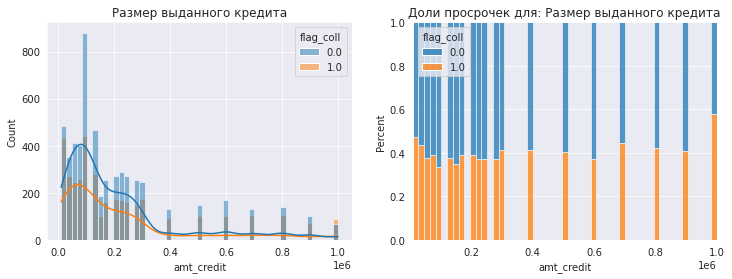

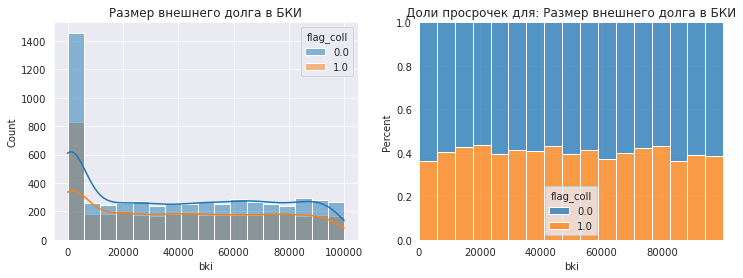

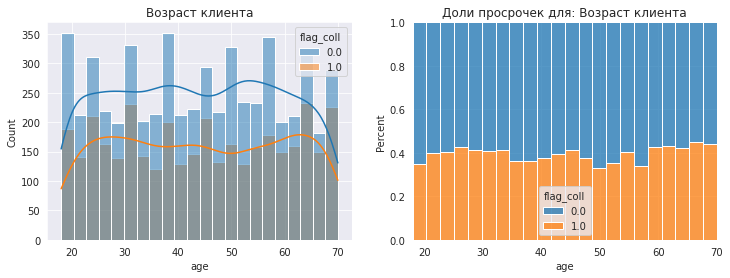

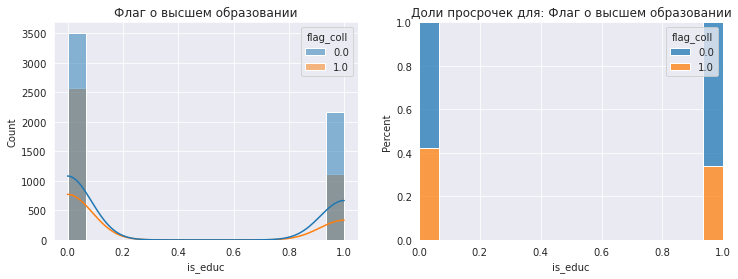

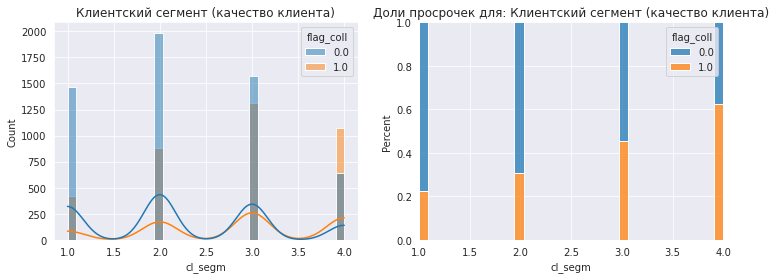

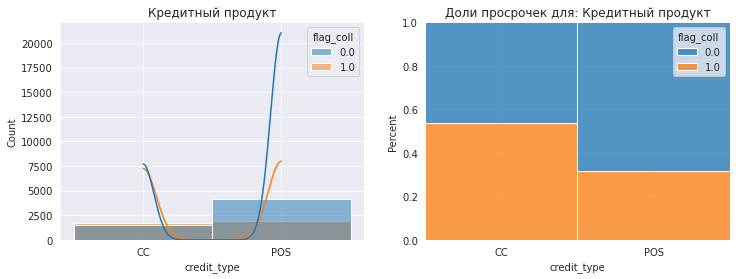

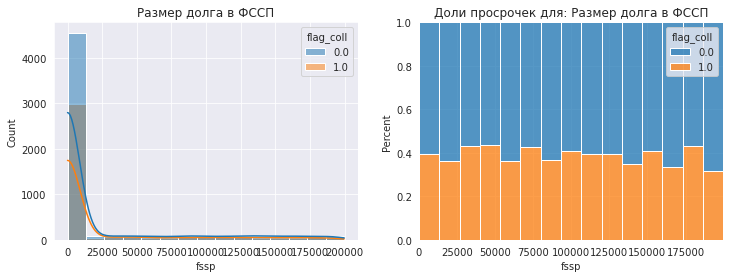

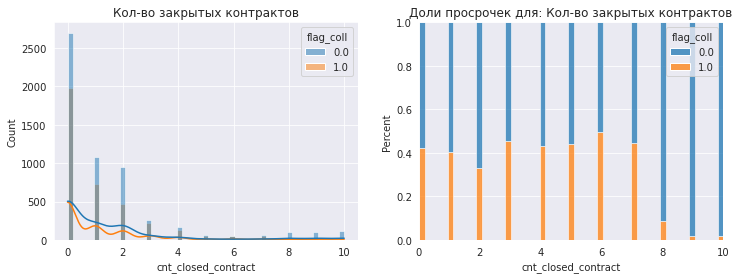

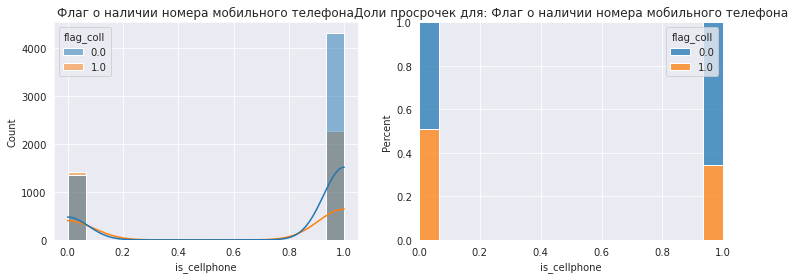

In [15]:
# Визуализаций признаков

for i in dict_features:
    visualization(df, i, dict_features[i], 'flag_coll')

### Замена категориальных признаков на числовые

In [16]:
# Converting categorical feature to numeric

df1 = df.drop(['id_client'], axis=1)
df1.credit_type = df.credit_type.map({'CC':0, 'POS':1})

df1.head()

,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
0,1.0,225000.0,26395.0,68.0,0.0,2.0,0,0.0,0.0,0.0
1,0.0,75000.0,89146.0,69.0,1.0,2.0,1,0.0,1.0,1.0
2,0.0,10000.0,35635.0,56.0,1.0,3.0,0,0.0,0.0,1.0
3,0.0,400000.0,60715.0,36.0,1.0,2.0,1,0.0,0.0,0.0
4,1.0,175000.0,38110.0,48.0,0.0,2.0,1,0.0,1.0,1.0


- ***посмотрю ещё и на карту корреляции признаков***

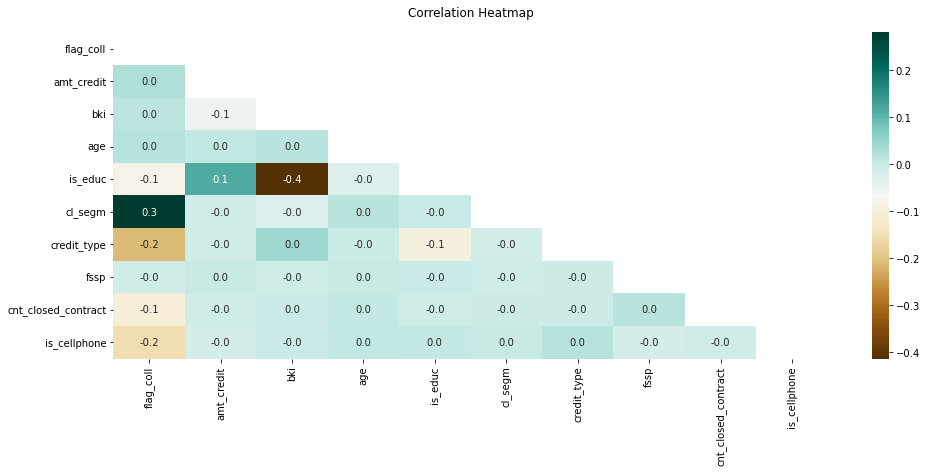

In [17]:
corr = df1.corr() # строим таблицу корреляции всех значений со всеми

# определяю маску, чтобы установить значения в верхнем треугольнике на True 
mask = np.triu(np.ones_like(df1.corr()))

# Plotting the heatmap of correlation between features
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(corr, fmt='.1f', annot=True, mask=mask, cmap='BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=16);

<div class="alert block-alert alert-warning">
</div>

>***Наблюдаются зависимости `flag_coll` (факт провала в просрочку) от:***
>- `cl_segm` (0.3) - клиентский сегмент (качество клиента, от 1 до 4)
>- `credit_type` (-0.2) - кредитный продукт:
    - CC - Credit Card (Кредитная карта)
    - POS - потребительский креди
>- `is_cellphone` (-0.2) - флаг, показывающий, есть ли у клиента подтвержденный номер мобильного телефона
>- `is_educ` (-0.1) - флаг, показывающий, есть ли у клиента высшее образование
>- `cnt_closed_contract` (-0.1) - кол-во уже закрытых клиентом контрактов в нашем банке

Все зависимости малые или очень малые

## Обучение модели и прогнозирование
[top](#Table-of-Contents)

### Feature Scaling

In [18]:
df1.amt_credit = (df1.amt_credit-min(df1.amt_credit))\
                    /(max(df1.amt_credit)-min(df1.amt_credit))

df1.bki = (df1.bki-min(df1.bki))/(max(df1.bki)-min(df1.bki))
df1.age = (df1.age-min(df1.age))/(max(df1.age)-min(df1.age))
df1.fssp = (df1.fssp-min(df1.fssp))/(max(df1.fssp)-min(df1.fssp))

df1.cnt_closed_contract = \
    (df1.cnt_closed_contract-min(df1.cnt_closed_contract))\
    /(max(df1.cnt_closed_contract)-min(df1.cnt_closed_contract))

In [19]:
df1.describe()

,flag_coll,amt_credit,bki,age,is_educ,cl_segm,credit_type,fssp,cnt_closed_contract,is_cellphone
count,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000,9356.000000
mean,0.394292,0.210825,0.402593,0.498302,0.349936,2.472531,0.650064,0.102779,0.131221,0.703399
std,0.488724,0.234346,0.326630,0.294531,0.476975,1.010471,0.476975,0.239433,0.206839,0.456784
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.065657,0.065571,0.250000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.116162,0.380788,0.500000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.267677,0.689819,0.750000,1.000000,3.000000,1.000000,0.000000,0.200000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000


### Decision Tree

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### Разделение выборки на тест и тренинг (сплитование)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(['flag_coll'], axis=1),
    df1.flag_coll,
    test_size= 0.2,
    random_state=0,
    stratify=df1.flag_coll
)

#### Создание классификатора и обучение модели

In [22]:
# Build a decision tree classifier from the training set (X, y)

tree = DecisionTreeClassifier() # классификатор дерева решений
tree.fit(X_train, y_train)

DecisionTreeClassifier()

#### Составление прогноза

In [23]:
# Predict class or regression value for X
y_pred = tree.predict(X_test)
y_pred

array([0., 1., 0., ..., 0., 1., 0.])

### Оценка точности классификатора

In [24]:
# Accuracy classification score

acc = accuracy_score(y_test,y_pred)
acc

0.6575854700854701

In [25]:
# Compute confusion matrix to evaluate the accuracy of a classification

cm=confusion_matrix(y_test, y_pred)
cm

array([[816, 318],
       [323, 415]])

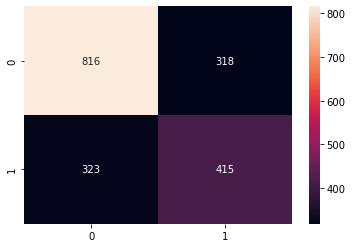

In [26]:
ax = sns.heatmap(cm, fmt='d', annot=True)
# ax.invert_yaxis()
# ax.invert_xaxis()

>***Качество модели:***  
>acc = 0.65 - не очень хорошо, но и не совсем плохо. 

- True positive (верно угаданная единица) **TP** = 412
- True negative (верно угаданный ноль) **TN** = 818
- False positive (нули, которые мы обозвали единицами) **FP** = 316
- False negative (единицы, которые мы обозвали нулями) **FN** = 326


### Оценка зависимости `accuracy_score` от соотношения размеров тестовой и тренинговой выборки

In [28]:
def classification_accuracy (df1, features, test_size):
    
    X_train, X_test, y_train, y_test = train_test_split(
    df1.drop(features, axis=1),
    df1[features],
    test_size= test_size,
    random_state=0,
    stratify=df1[features])
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    y_pred = tree.predict(X_test)
    
    acc = accuracy_score(y_test,y_pred)
    
    return acc

test_size = 0.1 acc = 0.6271
test_size = 0.2 acc = 0.6587
test_size = 0.3 acc = 0.6623
test_size = 0.4 acc = 0.6527
test_size = 0.5 acc = 0.6477
test_size = 0.6 acc = 0.6397
test_size = 0.7 acc = 0.6406
test_size = 0.8 acc = 0.6418
test_size = 0.9 acc = 0.6193


(0.6, 0.68)

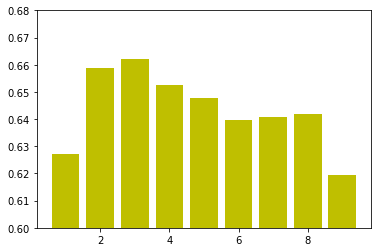

In [49]:
for i in range(1, 10):
    acc = classification_accuracy(df1, 'flag_coll', i/10)
    print(f'test_size = {i/10} acc = {round(acc, 4)}')
    plt.bar(i, acc, color = 'y')
plt.ylim([0.6, 0.68])

>***Вывод:***  
>`accuracy_score` от соотношения размеров тестовой и обучающей выборки практически ***не зависит***  
> Но всегда на сотые доли превалирует соотношение в районе 0.2 - 0.3
